## Classification (Iris dataset)

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand
---

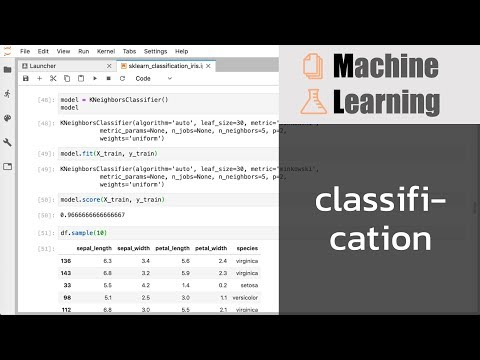

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('n2b_0GTN91Q', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.0.3
numpy   version = 1.18.1
seaborn version = 0.10.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-03-26 14:31:48.657424')

In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
43,5.0,3.5,1.6,0.6,setosa
101,5.8,2.7,5.1,1.9,virginica
108,6.7,2.5,5.8,1.8,virginica
27,5.2,3.5,1.5,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor
125,7.2,3.2,6.0,1.8,virginica
112,6.8,3.0,5.5,2.1,virginica
81,5.5,2.4,3.7,1.0,versicolor
23,5.1,3.3,1.7,0.5,setosa


$$ax^2+bx+c=0$$
$$\frac{2}{3}\sqrt{5}+x=10$$

In [7]:
a=5
b=7
c=a+b

In [ ]:
df.head(10)

In [ ]:
df.groupby('species').mean()

In [ ]:
df.species.value_counts()

In [ ]:
df.columns

In [ ]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
#              hue='species', 
#              markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

In [ ]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', 
             markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

In [ ]:
df.info()

# Scikit-learn: KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df.columns

In [ ]:
# use all data for training
# X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y_train = df.species
# y_train = df.species_code

test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    df.species, 
    test_size=test_size, random_state=7)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
df.sample(10)

In [ ]:
df.sample(5)

In [ ]:
model.predict([
    [3, 4, 5, 6]
              ])

In [ ]:
model.predict(
    [[3, 4, 5, 6]]
              )

In [ ]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

In [ ]:
df.groupby('species').mean()

In [ ]:
model.predict([
[5, 3, 1.2, .3],
[5, 3, 1.2, 2],
[6.5, 3, 5, 2]
              ])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
X_test[:5]

In [ ]:
y_test[:5]

In [ ]:
predicted = model.predict(X_test)
predicted

In [ ]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
# dx
dx[dx.y_true != dx.y_pred]

In [ ]:
cm=confusion_matrix(y_test, predicted)
cm

In [ ]:
labels=df.species.unique()
labels

In [ ]:
dcm=pd.DataFrame(cm, index=labels, columns=labels)
dcm

In [ ]:
def grandtotal(df):
    '''
    add grand total to sklearn confusion matrix dataframe
    '''
    index_labels=df.index.tolist()
    df=df.append(df.sum(axis=0), ignore_index=True)
    df.index=index_labels + ['total']
    df['total']=df.sum(axis=1)
    return df

In [ ]:
grandtotal(dcm)

In [ ]:
accuracy_score(y_test, predicted)

In [ ]:
print(classification_report(y_test, predicted))

## Logistic Regression

In [ ]:
model_b = LogisticRegression(solver='liblinear')
model_b

In [ ]:
model_b.fit(X_train, y_train)

In [ ]:
model_b.score(X_train, y_train)

In [ ]:
model_b.score(X_test, y_test)

In [ ]:
predicted_b = model_b.predict(X_test)
predicted_b

In [ ]:
print(confusion_matrix(y_test, predicted_b))

In [ ]:
print(accuracy_score(y_test, predicted_b))

In [ ]:
print(classification_report(y_test, predicted_b))